In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import numpy.linalg as la
import pandas as pd
import time
from IPython.display import clear_output
matplotlib.rcParams.update({'font.size': 22})
matplotlib.rcParams["mathtext.default"] = 'regular' #enable \mathcal{S}
import scipy.stats as sp


K_SPECIES_MAX = 150
D_DIMENSION = 2
P_NORM = 1
RNG = np.random.default_rng(seed=999)


def get_system(K_SPECIES_MAX, D_DIMENSION, P_NORM, method="normal", mean=0, scale=1.0, showplot=False, savefig=False):
    """Return a system of K_SPECIES_MAX uniformely distributed vectors on the normal simplex"""

    if method == "uniform":
        system = RNG.uniform(low=-1.0, high=1.0, size=(K_SPECIES_MAX, D_DIMENSION))
        
    elif method == "normal":
        system = RNG.normal(loc=mean, scale=scale, size=(K_SPECIES_MAX, D_DIMENSION))
        
    elif method == "multivariatenormal":
        cov = np.identity(D_DIMENSION) * scale
        system = RNG.multivariate_normal(mean=np.zeros(D_DIMENSION), cov=cov, size=K_SPECIES_MAX)

    elif method == "exponential":
        system = RNG.exponential(scale=scale, size=(K_SPECIES_MAX, D_DIMENSION))

    elif method == "laplace":
        system = RNG.laplace(scale=scale, size=(K_SPECIES_MAX, D_DIMENSION))
        
    else:
        raise ValueError("Method unavailable")
        
    system_normalized = np.empty((K_SPECIES_MAX, D_DIMENSION))
    
    for i, vector in enumerate(system):
        system_normalized[i] = vector/la.norm(vector, ord=P_NORM)
        
    if showplot:    
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
        ax1.scatter(system[:,0], system[:,1], label="Before normalization", s=3, zorder=2, color="blue")
        ax1.set_aspect('equal', adjustable='box')
        ax2.scatter(system[:,0], system[:,1], label="Before normalization", s=3, zorder=2, color="blue")
        ax2.scatter(system_normalized[:,0], system_normalized[:,1], label="After normalization", s=3, zorder=3, color="red")
        ax2.set_aspect('equal', adjustable='box')
        ax3.scatter(system_normalized[:,0], system_normalized[:,1], label="After normalization", s=3, zorder=3, color="red")
        ax3.set_aspect('equal', adjustable='box')
        
        for i, vector in enumerate(system):
            ax2.plot([system[i,0], system_normalized[i,0]],[system[i,1],system_normalized[i,1]], linewidth=1,c="lightgrey", zorder=1)
    
        for ax in [ax1, ax2, ax3]:
            ax.label_outer()
    
        ax2.legend(loc=(-0.2,1.05))
        plt.tight_layout()
        plt.xlim([-1.1,1.1])
        plt.ylim([-1.1,1.1])
        if savefig: fig.savefig(f"naive_normalization_L{P_NORM}_D{D_DIMENSION}_Kmax{K_SPECIES_MAX}.png")
        plt.show()
    
    return system, system_normalized


def get_system_iterative(K_SPECIES_MAX, D_DIMENSION, P_NORM, mean=0, std=1, plot=False):
    """Return a system of K_SPECIES_MAX strategy vectors normalized in Lp.
    Ancestor selection is uniform.
    """
    init = RNG.normal(scale=scale, size=D_DIMENSION)
    init_normalized = init/la.norm(init, ord=P_NORM)
    system = np.empty((K_SPECIES_MAX, D_DIMENSION))
    system[0] = init_normalized
    step = 1

    while step < K_SPECIES_MAX:
        ancestor_id = RNG.integers(step)
        ancestor = system[ancestor_id]
        descendant = ancestor + RNG.normal(loc=mean, scale=std, size=D_DIMENSION)
        system[step] = descendant / la.norm(descendant, ord=P_NORM)
        if plot:
            plt.plot([ancestor[0], descendant[0]], [ancestor[1], descendant[1]], c="lightgrey", zorder=1)
            plt.plot([descendant[0], system[step,0]], [descendant[1], system[step,1]], c="lightgrey", zorder=1)
        
        step += 1

    if plot:
        plt.scatter(system[:,0], system[:,1], label="After normalization", s=3, zorder=2)
        plt.tight_layout()
        ax = plt.gca()
        ax.set_aspect('equal', adjustable='box')
        plt.xlim([-1.1,1.1])
        plt.ylim([-1.1,1.1])
        plt.show()
        
    return system

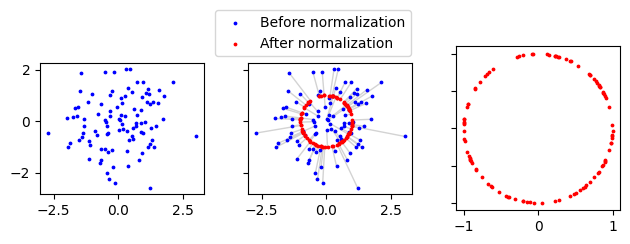

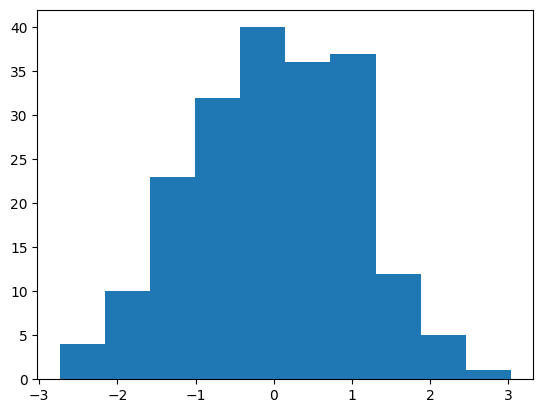

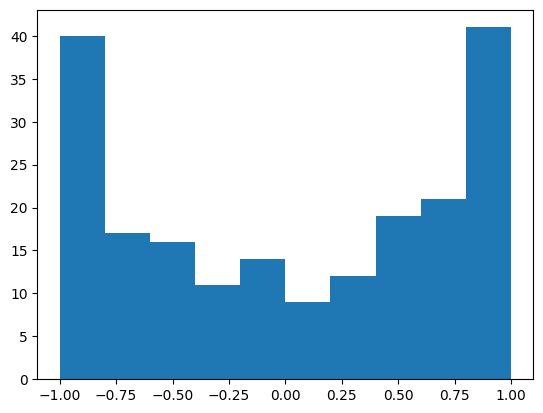

In [40]:
s = get_system(100, 2, 2, method="normal", showplot=True)
plt.hist(s[0].flatten())
plt.show()
plt.hist(s[1].flatten())
plt.show()

In 2D $L^1$, the laplace seems to work for systems allowing for negative strategies. Let's explore higher dimensions

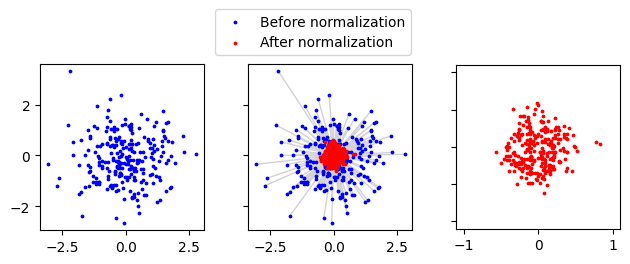

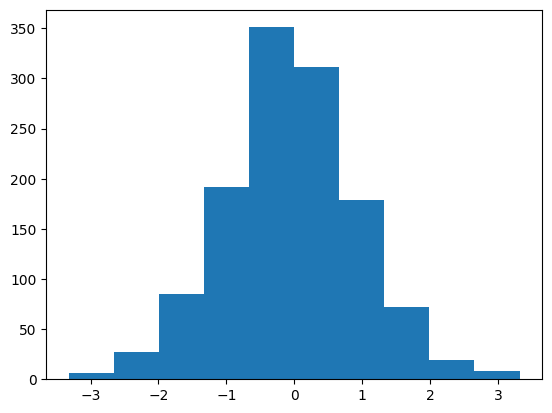

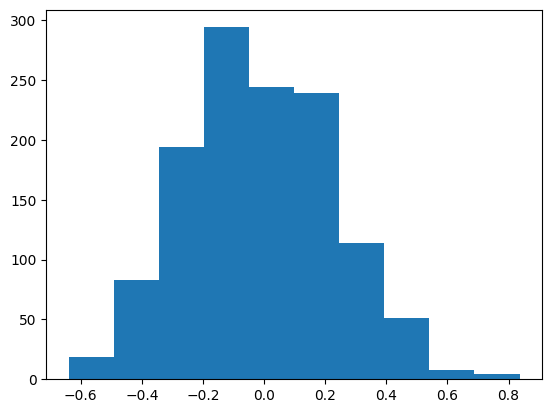

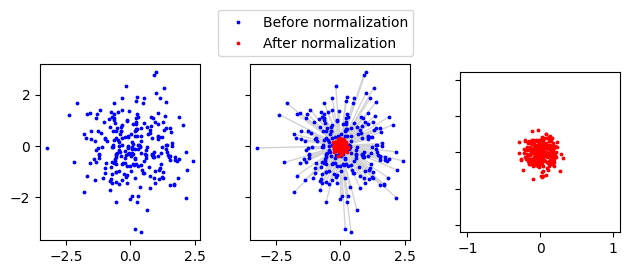

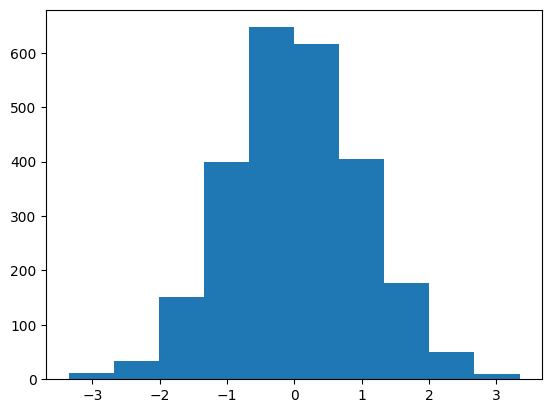

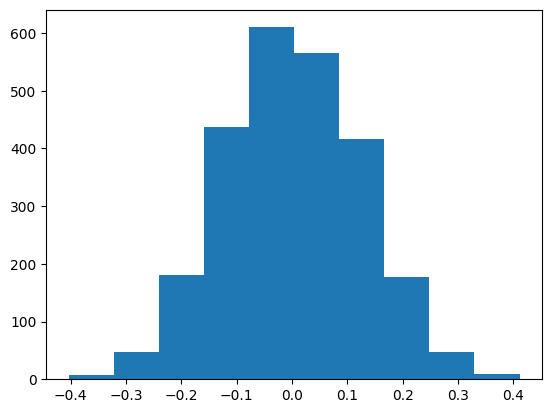

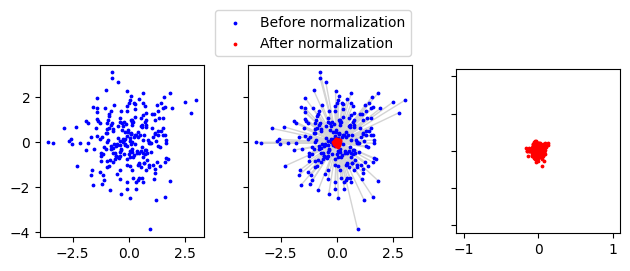

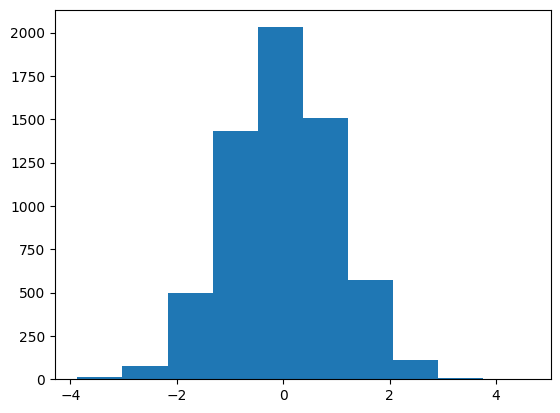

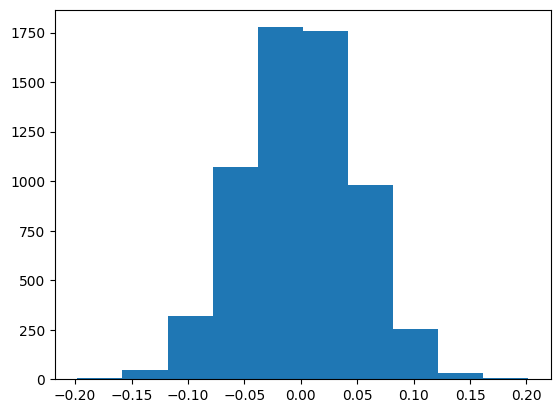

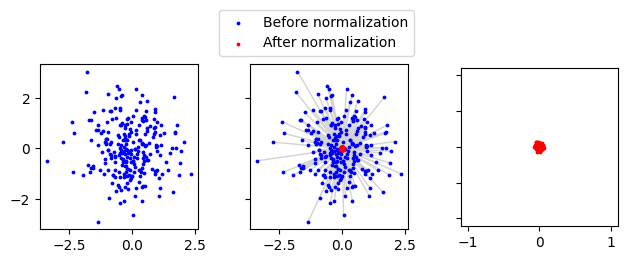

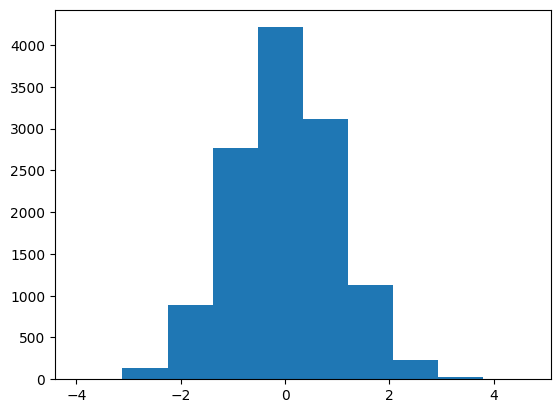

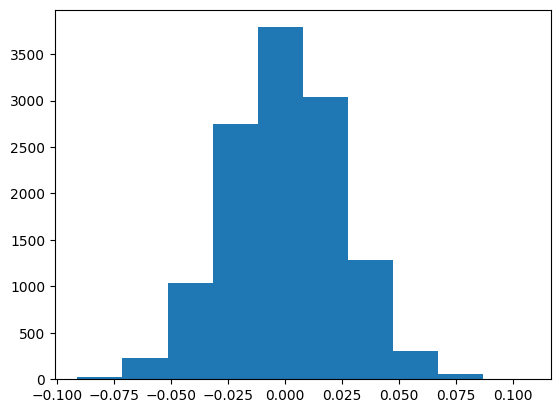

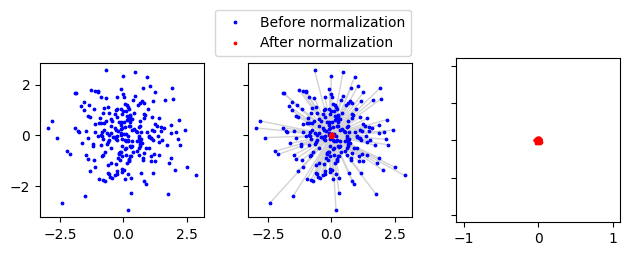

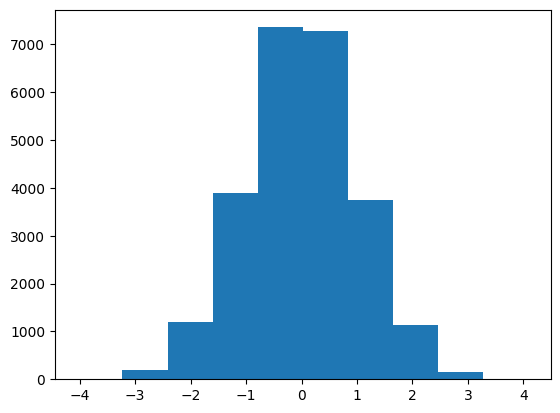

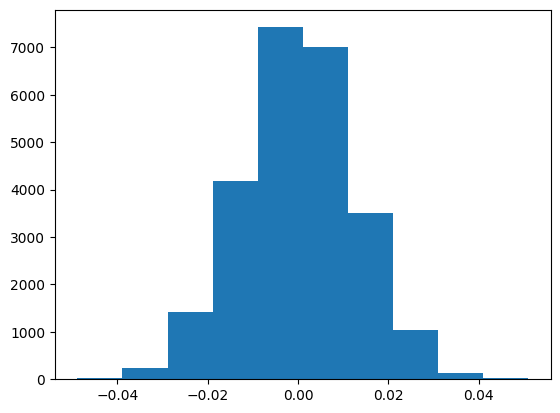

In [25]:
DIMS = [5, 10, 25, 50, 100]

for D in DIMS:
        s = get_system(250, D, 1, method="normal", showplot=True)
        plt.hist(s[0].flatten())
        plt.show()
        plt.hist(s[1].flatten())
        plt.show()

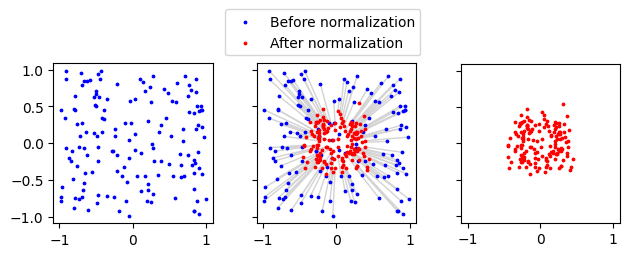

In [20]:
s = get_naive_system(150, 5, 1, showplot=True)

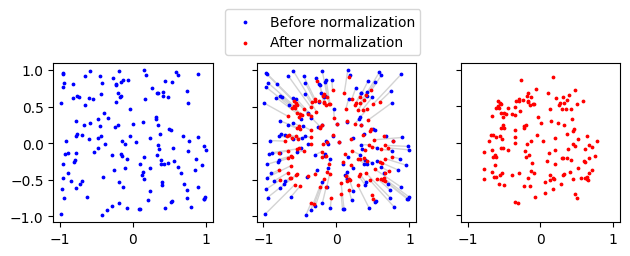

In [21]:
s = get_naive_system(150, 5, 2, showplot=True)

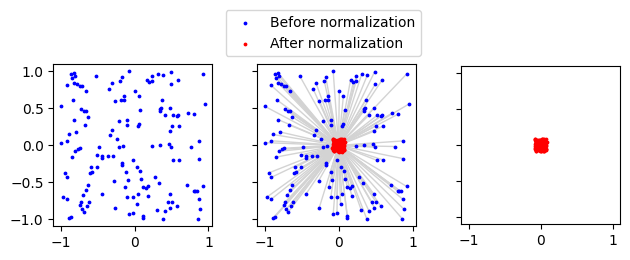

In [22]:
s = get_naive_system(150, 25, 1, showplot=True)

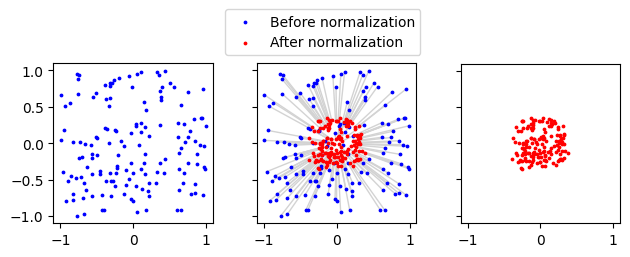

In [23]:
s = get_naive_system(150, 25, 2, showplot=True)

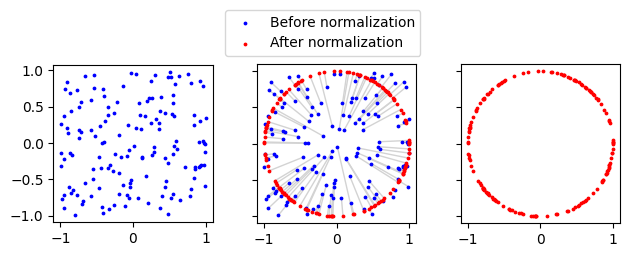

In [8]:
s = get_naive_system(150, 2, 2, plot=True)

In [5]:
def get_system_iterative_single_mutant(K_SPECIES_MAX, D_DIMENSION, P_NORM, mean=0, std=1, plot=False):
    """Return a system of K_SPECIES_MAX strategy vectors normalized in Lp.
    Ancestor selection is uniform.
    """
    init = RNG.uniform(low=-1.0, high=1.0, size=D_DIMENSION)
    init_normalized = init/la.norm(init, ord=P_NORM)
    system = np.empty((K_SPECIES_MAX, D_DIMENSION))
    system[0] = init_normalized
    step = 1

    while step < K_SPECIES_MAX:
        ancestor_id = RNG.integers(step)
        ancestor = system[ancestor_id]
        mutation = RNG.normal(loc=mean, scale=std)
        descendant = np.copy(ancestor)
        descendant[RNG.integers(D_DIMENSION)] += mutation
        system[step] = descendant / la.norm(descendant, ord=P_NORM)
        if plot:
            plt.plot([ancestor[0], descendant[0]], [ancestor[1], descendant[1]], c="lightgrey", zorder=1)
            plt.plot([descendant[0], system[step,0]], [descendant[1], system[step,1]], c="lightgrey", zorder=1)
        
        step += 1

    if plot:
        plt.scatter(system[:,0], system[:,1], label="After normalization", s=3, zorder=2)
        plt.tight_layout()
        ax = plt.gca()
        ax.set_aspect('equal', adjustable='box')
        plt.xlim([-1.1,1.1])
        plt.ylim([-1.1,1.1])
        plt.show()
        
    return system

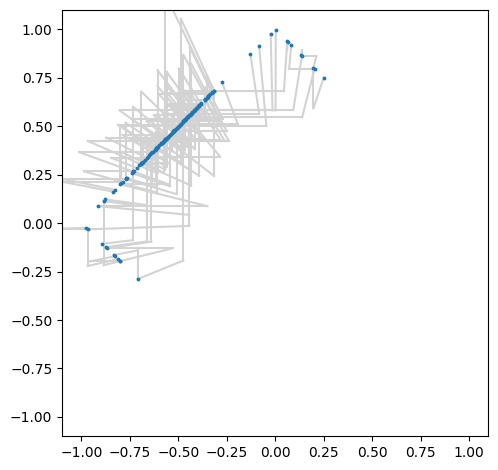

In [7]:
s=get_system_iterative_single_mutant(150, 2, 1, std=0.25, plot=True)


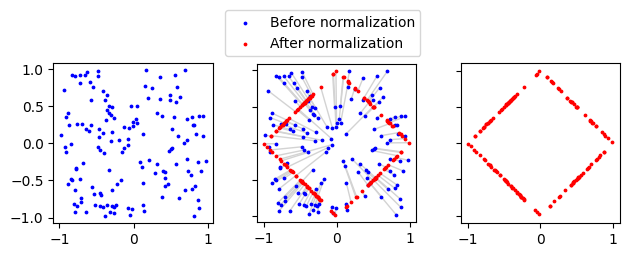

In [13]:
s = get_naive_system(150, 2, 1, showplot=True)

[[0.1 0. ]
 [0.  0.1]]
(150, 2)
(150, 2)


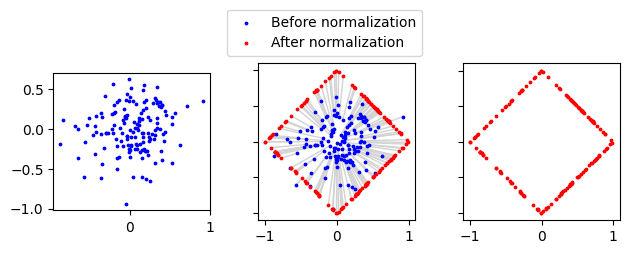

In [100]:
s = get_normal_system_multi(150, 2, 1, showplot=True)

2.620550894828009


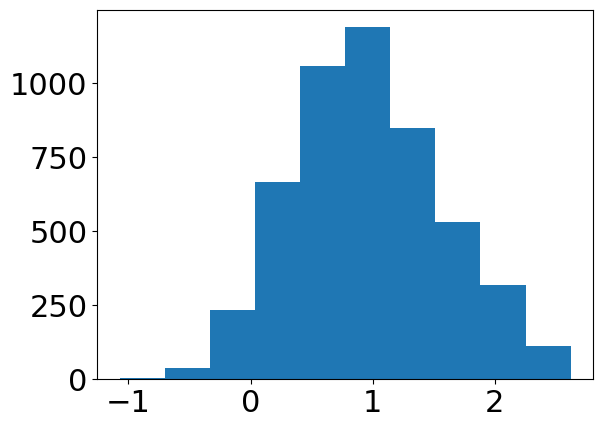

2.5825751262707923


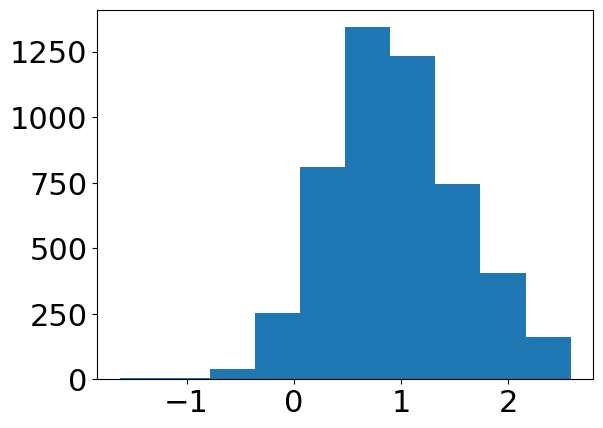

2.5557178401563707


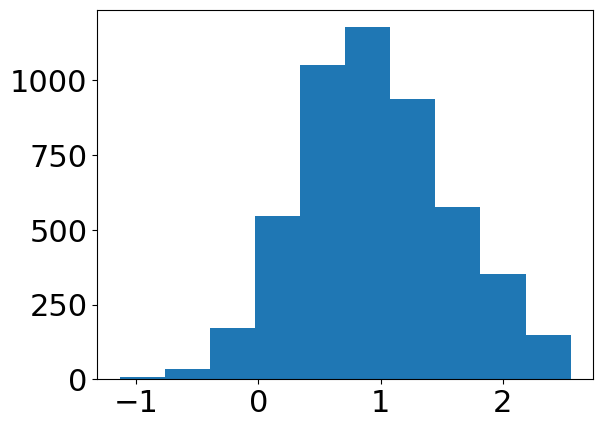

In [4]:
methods = ["uniform", "normal", "exponential"]

for method in methods:
    _, test = get_system(5000, 10, 0.9, method="exponential")
    skewnesses = sp.skew(test, axis=1)
    print(np.max(skewnesses))
    plt.hist(skewnesses)
    plt.show()

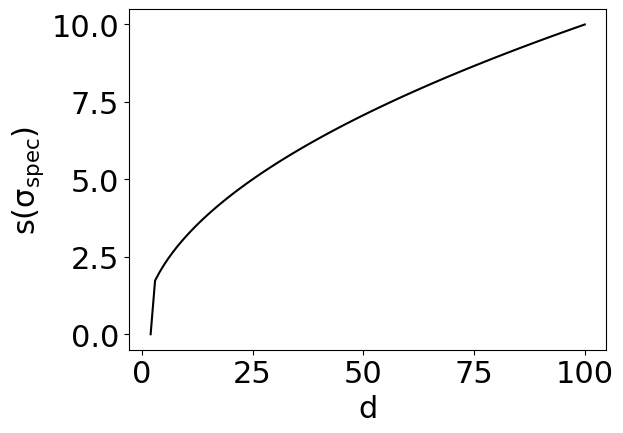

In [10]:
up_to_D = 100
x = []

res = np.empty(up_to_D-1)

for i in range(2,up_to_D+1):
    x.append(i)
    t=np.zeros(i)
    t[0]=1
    res[i-2] = sp.skew(t, bias=False)

plt.plot(x, res, c="black")
plt.xlabel("$d$")
plt.ylabel("$s(\sigma_{spec})$")
plt.tight_layout()
plt.savefig("skewness_specialist.png")
plt.show()

In [11]:
for i, s in enumerate(res):
    print(str(x[i]) + " & " + str(s) + " \\\\")

2 & 0.0 \\
3 & 1.7320508075688779 \\
4 & 2.0 \\
5 & 2.236067977499789 \\
6 & 2.449489742783177 \\
7 & 2.6457513110645903 \\
8 & 2.8284271247461894 \\
9 & 2.9999999999999996 \\
10 & 3.1622776601683795 \\
11 & 3.3166247903554 \\
12 & 3.464101615137755 \\
13 & 3.605551275463988 \\
14 & 3.741657386773943 \\
15 & 3.8729833462074135 \\
16 & 4.000000000000001 \\
17 & 4.123105625617659 \\
18 & 4.242640687119284 \\
19 & 4.358898943540674 \\
20 & 4.47213595499958 \\
21 & 4.582575694955837 \\
22 & 4.690415759823425 \\
23 & 4.795831523312717 \\
24 & 4.898979485566356 \\
25 & 4.999999999999999 \\
26 & 5.099019513592787 \\
27 & 5.196152422706636 \\
28 & 5.29150262212918 \\
29 & 5.385164807134499 \\
30 & 5.477225575051665 \\
31 & 5.567764362830014 \\
32 & 5.656854249492381 \\
33 & 5.744562646538028 \\
34 & 5.830951894845303 \\
35 & 5.916079783099615 \\
36 & 6.0000000000000036 \\
37 & 6.082762530298218 \\
38 & 6.164414002968973 \\
39 & 6.244997998398391 \\
40 & 6.324555320336758 \\
41 & 6.403124237432

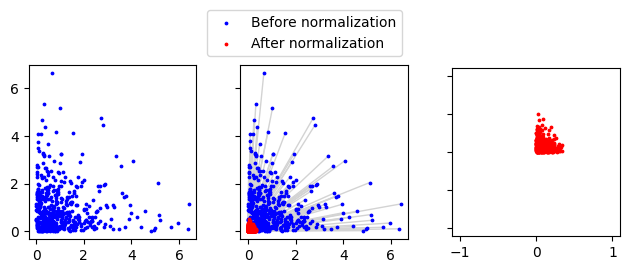

In [39]:
_, test = get_system(500,10,0.9,method="exponential",showplot=True)

In [8]:
test = np.identity(30)
print(test[:, :5])
sp.skew(test[:, :5], axis=1)

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


array([1.5, 1.5, 1.5, 1.5, 1.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. ])

In [18]:
df = pd.DataFrame(np.identity(10))

In [15]:
print(df.skew(axis=1))

0    3.162278
1    3.162278
2    3.162278
3    3.162278
4    3.162278
5    3.162278
6    3.162278
7    3.162278
8    3.162278
9    3.162278
dtype: float64
